# 축구 이적시장 데이터를 활용한 데이터 시각화 및 머신러닝 분석
- Developed by Dr. Keungoui KIM & Mr. Seunghyun Baek
- https://github.com/awekim
- Data resource: https://www.kaggle.com/code/davidcoxon/football-transfer-market-eda-basic-modelling/input

### 3. 머신러닝 기초

In [65]:
import pandas as pd
import seaborn as sns

appearances = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/appearances.csv')
club_games = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/club_games.csv')
clubs = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/clubs.csv')
competitions = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/competitions.csv')
game_events = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/game_events.csv')
games = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/games.csv')
player_valuations = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/player_valuations.csv')
players = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/players.csv')

## 데이터 전처리하기

- 결측치

In [ ]:
import numpy as np

1 + np.NaN

nan

In [ ]:
1 * 3 * 2 * np.NaN

nan

In [ ]:
game_events.head()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


In [ ]:
# 왜 결과가 다를까요? - 1
game_events.player_in_id.mean()

250862.56520760074

In [ ]:
# 왜 결과가 다를까요? - 2
game_events.player_in_id.mean(skipna=False)

nan

In [ ]:
# 결측치를 찾으세요
game_events.isnull()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
725282,False,False,False,False,False,False,False,False,True,True
725283,False,False,False,False,False,False,False,False,False,True
725284,False,False,False,False,False,False,False,False,False,True
725285,False,False,False,False,False,False,False,False,True,False


In [ ]:
game_events.isnull().sum()

,0
game_event_id,0
date,0
game_id,0
minute,0
type,0
club_id,0
player_id,0
description,319444
player_in_id,285645
player_assist_id,678257


In [ ]:
# 결측치를 제거하세요
game_events.loc[game_events.player_assist_id.isnull()==False]

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
5,eef9c46dd75c3aa4c6a503225427446e,2012-08-05,2211607,11,Goals,383,38497,", Right-footed shot, 1. Tournament Goal Assist...",NaN,33210.0
7,7717860e3b0376b86f445f4749fa2ce5,2012-08-05,2211607,44,Goals,610,42710,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,4425.0
9,d1be2ce4bd5f0ca091c1b15a8569301c,2012-08-05,2211607,90,Goals,383,49499,", Right-footed shot, 1. Tournament Goal Assist...",NaN,167850.0
...,...,...,...,...,...,...,...,...,...,...
725269,4e55736e798878407932081f63933ba4,2024-03-17,4300788,105,Goals,31,565822,", 1. Tournament Goal Assist: , 3. Tournament A...",NaN,624258.0
725276,5d94f94e88d5a6210e35d9c836ca9d00,2024-03-16,4300789,90,Goals,990,315291,", Right-footed shot, 2. Tournament Goal Assist...",NaN,511550.0
725279,df299fa444aaca27236c86ab5e686a60,2024-03-16,4300789,53,Goals,990,511550,", 4. Tournament Goal Assist: , 1. Tournament A...",NaN,412823.0
725280,273544329859c0321232cba349deabfd,2024-03-16,4300789,90,Goals,990,511550,", Header, 5. Tournament Goal Assist: , 1. Tour...",NaN,788283.0


- 이상치

## 비지도학습: k-means 클러스터링

In [ ]:
# 패키지와 분석용 샘플 데이터를 만듭니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 300
n_features = 2
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=n_clusters,
                  n_features=n_features, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

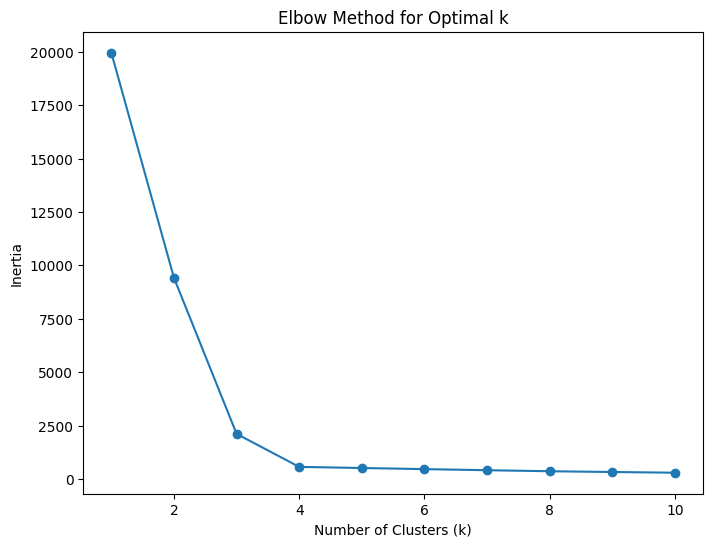

In [ ]:
# 엘보우 메써드로 적정 k 찾기
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# optimal k로 k-means clustering 분석
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [ ]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([3, 3, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       1, 3, 0, 3, 3, 1, 1, 2, 0, 2, 3, 2, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 2, 3, 2, 1, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 1, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 1,
       0, 2, 1, 3, 3, 2, 0, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2,
       2, 3, 0, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 2, 3, 1, 3, 3, 0, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 3, 3, 3, 1,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3], d

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-2.70981136,  8.97143336],
       [-6.83235205, -6.83045748],
       [ 4.7182049 ,  2.04179676],
       [-8.87357218,  7.17458342]])

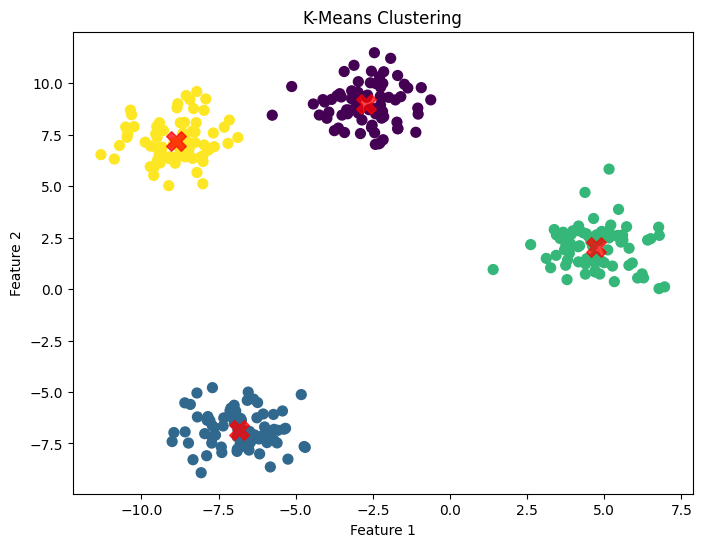

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

(plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200,
            alpha=0.75, marker='X'))

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 비지도학습: k-means 클러스터링 - 축구 데이터

In [ ]:
# 선수들의 키, 시장가치, 포지션, 주발 정보를 활용해 클러스터링을 해보세요.

In [ ]:
# 먼저 분석에 사용할 수 있는 샘플 데이터셋을 만듭니다.
players_type = players[['height_in_cm','market_value_in_eur','position','foot']]
players_type.dropna(inplace=True)
players_type

<ipython-input-80-437d857ee3ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_type.dropna(inplace=True)


,height_in_cm,market_value_in_eur,position,foot
0,184.0,1000000.0,Attack,right
1,190.0,750000.0,Goalkeeper,left
4,194.0,100000.0,Goalkeeper,right
7,179.0,350000.0,Midfield,both
8,193.0,200000.0,Goalkeeper,right
...,...,...,...,...
30487,177.0,175000.0,Attack,right
30490,173.0,150000.0,Midfield,right
30493,178.0,75000.0,Attack,right
30494,193.0,50000.0,Goalkeeper,right


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 엘보우 메써드로 적정 k 찾기
inertia = []
for k in range(1, 11):
    playerkmeans = KMeans(n_clusters=k, random_state=42)
    playerkmeans.fit(players_type)
    inertia.append(playerkmeans.inertia_)

# 엘보우 메서드 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

ValueError: could not convert string to float: 'Attack'

In [ ]:
# 왜 안될까요? 데이터 "타입"을 생각해봅시다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

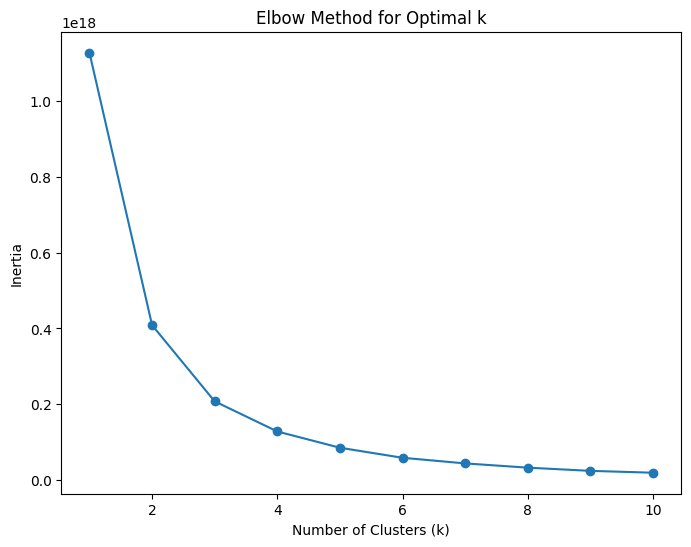

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 변수를 만들어 줍니다.
onehot_encoder = OneHotEncoder()

# players_type의 position과 foot 열에 one-hot 인코딩을 수행합니다.
encoded_features = onehot_encoder.fit_transform(players_type[['position', 'foot']]).toarray()

# OneHotEncoder로 변환된 열의 이름을 가져옵니다.
encoded_feature_names = onehot_encoder.get_feature_names_out(['position', 'foot'])

# 인코딩된 데이터를 encoded_df라는 DataFrame 형식으로 저장합니다.
# 이 때 열의 이름은 위에서 추출한 이름을 사용합니다.
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=players_type.index)

# 데이터에 인코딩한 열을 추가한 players_type_encoded라는 데이터프레임을 만듭니다.
players_type_encoded = pd.concat([
    players_type.drop(columns=['position', 'foot']).reset_index(drop=True),  # 기존 숫자형 데이터
    encoded_df.reset_index(drop=True)  # 원-핫 인코딩된 데이터
], axis=1)

inertia = []
for k in range(1, 11):
    playerkmeans = KMeans(n_clusters=k, random_state=42)
    playerkmeans.fit(players_type_encoded)
    inertia.append(playerkmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# optimal k로 k-means clustering 분석 & 예측
optimal_k = 3
playerkmeans = KMeans(n_clusters=optimal_k, random_state=42)
playerkmeans.fit(players_type_encoded)

playery_kmeans = playerkmeans.predict(players_type_encoded)
playery_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

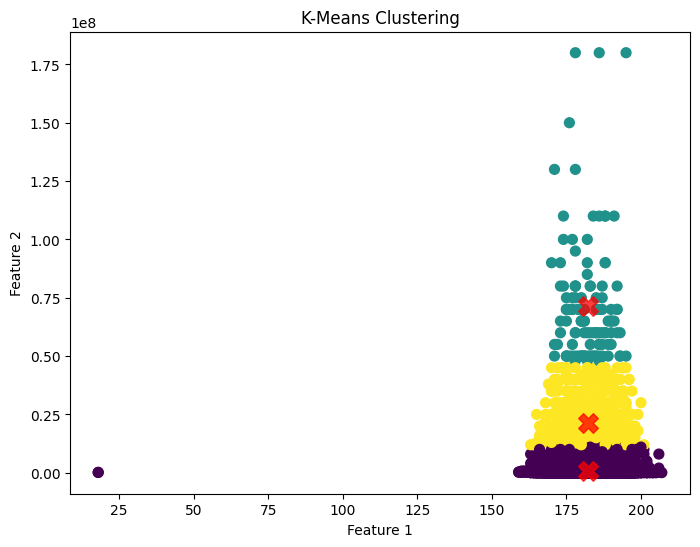

In [ ]:
# 시각화
playercenters = playerkmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(players_type_encoded.iloc[:, 0], players_type_encoded.iloc[:, 1], c=playery_kmeans, s=50, cmap='viridis')

plt.scatter(playercenters[:, 0], playercenters[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# 결과가 어떤가요? 좋은 클러스터링 결과라고 생각하나요?

<ipython-input-85-272e0b923b0e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_type[['height_in_cm', 'market_value_in_eur']] = scaler.fit_transform(players_type[['height_in_cm', 'market_value_in_eur']])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10

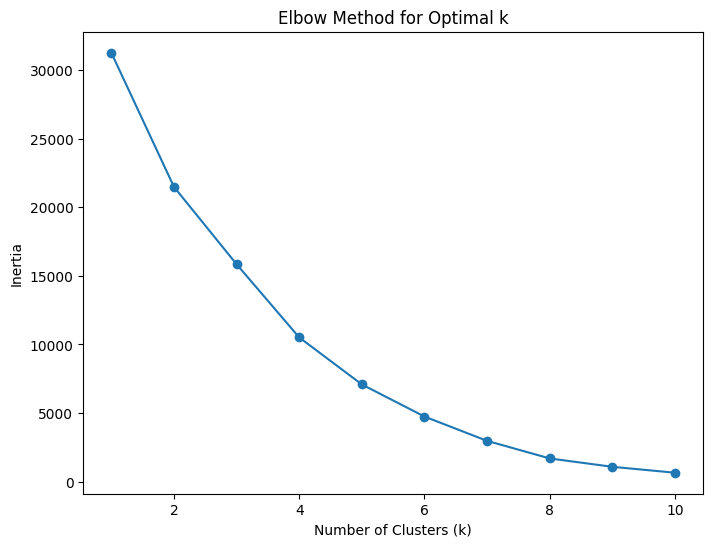

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

onehot_encoder = OneHotEncoder()
encoded_features = onehot_encoder.fit_transform(players_type[['position', 'foot']]).toarray()
encoded_feature_names = onehot_encoder.get_feature_names_out(['position', 'foot'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=players_type.index)

# 정규화를 위한 MinMaxScaler 변수를 만듭니다.
scaler = MinMaxScaler()

# height_in_cm와 market_value_in_eur 컬럼에 정규화를 적용합니다.
players_type[['height_in_cm', 'market_value_in_eur']] = scaler.fit_transform(players_type[['height_in_cm', 'market_value_in_eur']])

# 정규화된 데이터와 인코딩한 데이터를 합칩니다.
players_type_encoded = pd.concat([
    players_type.drop(columns=['position', 'foot']).reset_index(drop=True),  # 기존 숫자형 데이터
    encoded_df.reset_index(drop=True)  # 원-핫 인코딩된 데이터
], axis=1)

inertia = []
for k in range(1, 11):
    playerkmeans = KMeans(n_clusters=k, random_state=42)
    playerkmeans.fit(players_type_encoded)
    inertia.append(playerkmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# optimal k로 k-means clustering 분석 & 예측
optimal_k = 5
playerkmeans = KMeans(n_clusters=optimal_k, random_state=42)
playerkmeans.fit(players_type_encoded)

playery_kmeans = playerkmeans.predict(players_type_encoded)
playery_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 4, 2, ..., 1, 2, 3], dtype=int32)

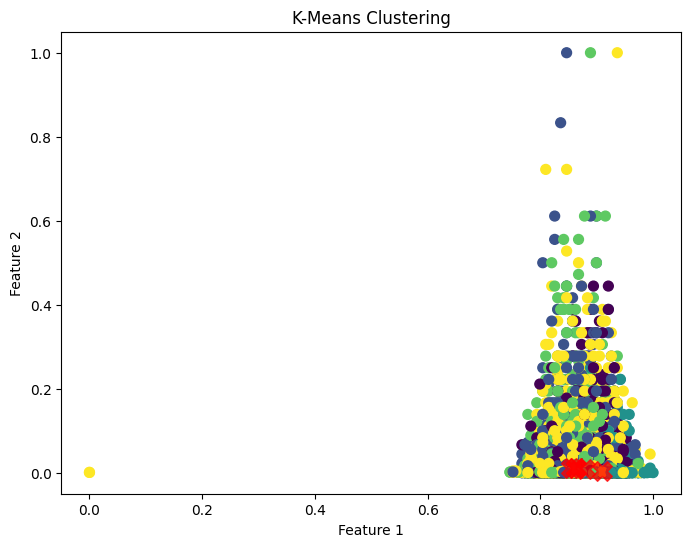

In [ ]:
# 시각화
playercenters = playerkmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(players_type_encoded.iloc[:, 0], players_type_encoded.iloc[:, 1], c=playery_kmeans, s=50, cmap='viridis')

plt.scatter(playercenters[:, 0], playercenters[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 지도학습: Support Vector Machine


In [66]:
# 전체 Dataframe에서 내가 사용하고 싶은 column들만 정제

df1 = pd.DataFrame({'Player_id' : players.player_id,
                    'Position' : players.position,
                    'Foot' : players.foot,
                    'Height': players.height_in_cm,
                    'Market_val' : players.market_value_in_eur,
                    'Highest_market_val' : players.highest_market_value_in_eur})
df2 = pd.DataFrame({'Player_id' : appearances.player_id,
                    'Goals' : appearances.goals,
                    'Assists' : appearances.assists,
                    'Play_time' : appearances.minutes_played})

In [67]:
# df1과 df2를 merge
# 중복값과 결측치를 제거

SVM_df = pd.merge(df1, df2, how = 'inner', on = 'Player_id')
SVM_df = SVM_df.drop_duplicates(['Player_id'])
SVM_df = SVM_df.dropna(axis = 0)

SVM_df.count()

,0
Player_id,22465
Position,22465
Foot,22465
Height,22465
Market_val,22465
Highest_market_val,22465
Goals,22465
Assists,22465
Play_time,22465


In [68]:
SVM_df.isnull().sum()

,0
Player_id,0
Position,0
Foot,0
Height,0
Market_val,0
Highest_market_val,0
Goals,0
Assists,0
Play_time,0


In [69]:
mean_val = SVM_df['Play_time'].mean()

mean_val

52.76251947473848

In [70]:
# 분류하고 싶은 기준인 Value_level을 Play_time을 사용하여 생성

SVM_df['Value_level'] = [1 if x > mean_val else 0 for x in SVM_df['Play_time']]

SVM_df.Value_level.value_counts()

,count
Value_level,
1,11656
0,10809


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [72]:
SVM_df.head()

,Player_id,Position,Foot,Height,Market_val,Highest_market_val,Goals,Assists,Play_time,Value_level
0,10,Attack,right,184.0,1000000.0,30000000.0,1,0,83,1
136,26,Goalkeeper,left,190.0,750000.0,8000000.0,0,0,90,1
414,80,Goalkeeper,right,194.0,100000.0,3000000.0,0,0,90,1
474,132,Midfield,both,179.0,350000.0,17500000.0,0,0,11,0
551,215,Attack,right,193.0,250000.0,12000000.0,0,0,22,0


In [73]:
# 문자열 Label Encoder 작업

le = LabelEncoder()
SVM_df['Position'] = le.fit_transform(SVM_df['Position'])
SVM_df['Foot'] = le.fit_transform(SVM_df['Foot'])

features = ['Position', 'Goals']
X = SVM_df[features]
y = SVM_df['Value_level']

In [74]:
# train, test set 정의

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
X_test.head()

,Position,Goals
1237865,0,0
1032695,1,0
1173212,1,0
896614,0,0
1462835,3,0


In [77]:
y_test.head()

,Value_level
1237865,0
1032695,1
1173212,0
896614,0
1462835,0


In [78]:
# Normalization 작업

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# SVM model 정의

svm_model = SVC(kernel='linear', C=1)
# svm_model = SVC(kernel='poly', degree=3, gamma=10, coef0 = 1)  # 커널은 필요에 따라 변경 가능
# svm_model = SVC(kernel='rbf', gamma = 'auto', coef0 = 1)

svm_model.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [80]:
y_pred = svm_model.predict(X_test_scaled)

# 모델 평가
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.59      0.55      3241
           1       0.55      0.46      0.50      3499

    accuracy                           0.52      6740
   macro avg       0.53      0.53      0.52      6740
weighted avg       0.53      0.52      0.52      6740

Accuracy: 0.5237388724035609


In [81]:
# 실제값과 예측값을 비교한 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred
})

pd.set_option('display.max_rows', None)

# 표 출력
comparison_df.head()

,Actual Value,Predicted Value
1237865,0,0
1032695,1,0
1173212,0,0
896614,0,0
1462835,0,1


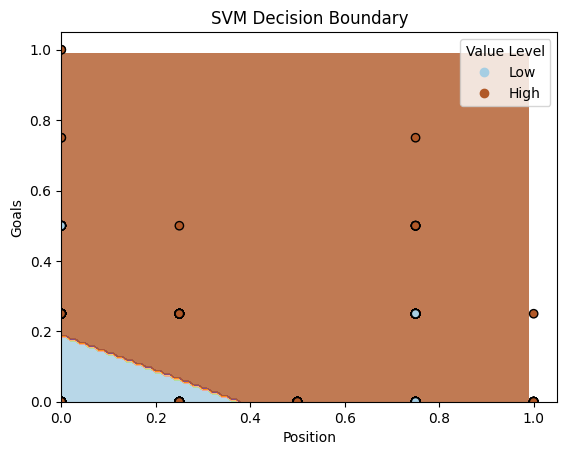

In [82]:
# 시각화를 위한 함수 정의
def plot_decision_boundary(X, y, model):
    x_min, x_max = 0,1
    y_min, y_max = 0,1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('SVM Decision Boundary')
    plt.legend(handles=scatter.legend_elements()[0], labels=['Low', 'High'], title="Value Level")
    plt.show()

plot_decision_boundary(X_test_scaled, y_test, svm_model)